In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
from scipy.stats import t
import scipy.stats as stats
from scipy.stats import f

### Idéer inför inlämning
- Correlation between fuel efficiency and other variables such as weight, horsepower and acceleration
- How fuel efficiency has changed over time
- numbers of cylinders and their fuel efficiancy
- mpg compared between cylinder
- predict the mpg based on other characteristics
- Identifying patterns and trends in the data that can be used to improve fuel efficiency in the future.
- Investigating any relationship between the year of car and mpg

In [4]:
df = pd.read_csv("../Statistik/Files/cars.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
unique_cylinders = df["cylinders"].unique() # Kollar hur många olika cylindertyper som används i datasetet
unique_cylinders
# Skapar variabler för alla olika cylindertyper
# Inkluderar antalet datapunkter som kommentar jämte variabeln
df3 = df[df["cylinders"] == 3] # 4
df5 = df[df["cylinders"] == 5] # 3

# Jag använder mig endast utav 6 & 8 eftersom det är för små mängder utav 3 & 5
df6 = df[df["cylinders"] == 6] # 84
df8 = df[df["cylinders"] == 8] # 103

In [6]:
print(f"Antal olika unika cylindertyper: {unique_cylinders}")
print(f"Antalet datapunkter för 3-cylindriga motorer: {df3.shape[0]}") # Printar antalet rader för df
print(f"Antalet datapunkter för 5-cylindriga motorer: {df5.shape[0]}")
print(f"Antalet datapunkter för 6-cylindriga motorer: {df6.shape[0]}")
print(f"Antalet datapunkter för 8-cylindriga motorer: {df8.shape[0]}")

Antal olika unika cylindertyper: [8 4 6 3 5]
Antalet datapunkter för 3-cylindriga motorer: 4
Antalet datapunkter för 5-cylindriga motorer: 3
Antalet datapunkter för 6-cylindriga motorer: 84
Antalet datapunkter för 8-cylindriga motorer: 103


# Histoplot/fördelning

In [ ]:
sns.distplot(df6['weight'], bins=30)
sns.distplot(df8['weight'], bins=30)


In [ ]:
sns.distplot(df6['mpg'], bins=30, color="blue")
sns.distplot(df8['mpg'], bins=30, color="orange")

# Probability plot

In [ ]:
stats.probplot(df6['weight'], dist="norm", plot=plt)
stats.probplot(df8['weight'], dist="norm", plot=plt)

In [ ]:
stats.probplot(df6['mpg'], dist="norm", plot=plt)
stats.probplot(df8['mpg'], dist="norm", plot=plt)

### Konfidensintervall för medelvärdet av bilarnas vikter (både 6 och 8 cylinder)

In [7]:
# Kollar medelvärdet, medianen och standardavvikelsen på båda cylindertyper
# Beräknar även n-värdet för stickprov (för konfidensintervall)
df6_mean_weight = df6["weight"].mean() # 3198 mean / 3201 median
df8_mean_weight = df8["weight"].mean() # 4114 mean / 4140 median

df6_std = df6["weight"].std() # 332
df8_std = df8["weight"].std() # 448

df6_n = len(df6) # 84
df8_n = len(df8) # 103

KI_alpha = 0.05 # Använder 95% KI så att intervallerna blir alldeles för stora
t_crit_df6 = t.ppf(1-KI_alpha/2, df6_n-1)
t_crit_df8 = t.ppf(1-KI_alpha/2, df8_n-1)

sem_df6 = df6_std/np.sqrt(df6_n)
sem_df8 = df8_std/np.sqrt(df8_n)

lower_df6 = df6_mean_weight - t_crit_df6 * sem_df6
lower_df8 = df8_mean_weight - t_crit_df8 * sem_df8

upper_df6 = df6_mean_weight + t_crit_df6 * sem_df6
upper_df8 = df8_mean_weight + t_crit_df8 * sem_df8

upper_df6 = str(round(upper_df6, 1))
upper_df8 = str(round(upper_df8, 1))
lower_df6 = str(round(lower_df6, 1))
lower_df8 = str(round(lower_df8, 1)) # Avrundning till 1 decimal

In [8]:
print(f"Medelvikten för 6-cylindriga bilar med en 95% KI: {lower_df6} - {upper_df6}")
print(f"Medelvikten för 8-cylindriga bilar med en 95% KI: {lower_df8} - {upper_df8}")

Medelvikten för 6-cylindriga bilar med en 95% KI: 3126.1 - 3270.3
Medelvikten för 8-cylindriga bilar med en 95% KI: 4027.0 - 4202.4


### MPG

In [9]:
df6_mean_mpg = df6["mpg"].mean() # 20 mean / 19 median
df8_mean_mpg = df8["mpg"].mean() # 15 mean / 14 median
df6_std_mpg = df6["mpg"].std() # 3.81
df8_std_mpg = df8["mpg"].std() # 2.83


lower_df6_mpg = df6_mean_mpg - t_crit_df6 * sem_df6
lower_df8_mpg = df8_mean_weight - t_crit_df8 * sem_df8

upper_df6_mpg = df6_mean_mpg + t_crit_df6 * sem_df6
upper_df8_mpg = df8_mean_weight + t_crit_df8 * sem_df8

upper_df6_mpg = str(round(upper_df6_mpg, 1))
upper_df8_mpg = str(round(upper_df8_mpg, 1))
lower_df6_mpg = str(round(lower_df6_mpg, 1))
lower_df8_mpg = str(round(lower_df8_mpg, 1))

sem_df6_mpg = scs.sem(df6["mpg"])
sem_df8_mpg = scs.sem(df8["mpg"])

### Konfidensintervall för mpg på både 6- och 8-cylindriga motorer.

In [10]:
lower_df6_mpg, upper_df6_mpg = t.interval(
    confidence=1 - KI_alpha, df=df6_n - 1, loc=df6_mean_mpg, scale=sem_df6_mpg
)
print(
    f"Medelvärdet på mpg för 6-cylindriga bilar med en 95% KI: {str(round(lower_df6_mpg, 1))}-{str(round(upper_df6_mpg, 1))}"
)

lower_df8_mpg, upper_df8_mpg = t.interval(
    confidence=1 - KI_alpha, df=df8_n - 1, loc=df8_mean_mpg, scale=sem_df6_mpg
)
print(
    f"Medelvärdet på mpg för 8-cylindriga bilar med en 95% KI: {str(round(lower_df8_mpg, 1))}-{str(round(upper_df8_mpg, 1))}"
)


Medelvärdet på mpg för 6-cylindriga bilar med en 95% KI: 19.2-20.8
Medelvärdet på mpg för 8-cylindriga bilar med en 95% KI: 14.1-15.8


# Proportioner för både mpg och viktskillnad

In [11]:

average_df6_mpg = (lower_df6_mpg + upper_df6_mpg) / 2
average_df8_mpg = (lower_df8_mpg + upper_df8_mpg) / 2
 
mpg_prop = average_df8_mpg/average_df6_mpg
mpg_prop = float(round(mpg_prop, 3))

average_df6_weight = (float(lower_df6) + float(upper_df6)) / 2
average_df8_weight = (float(lower_df8) + float(upper_df8)) / 2

weight_prop = average_df6_weight/average_df8_weight
weight_prop = float(round(weight_prop, 3))

print(f"Skillnad proportionerligt i mpg (8-cylindrig lägre): {mpg_prop}")
print(f"Skillnad proportionerligt i vikt (6-cylindrig lägre): {weight_prop}")

Skillnad proportionerligt i mpg (8-cylindrig lägre): 0.749
Skillnad proportionerligt i vikt (6-cylindrig lägre): 0.777


# Hypotestest
### Accerlation varians större för 8-cylinder jämfört med 6-cylinder

$H_A: \sigma^2_{8-cylinder} > \sigma^2_{6-cylinder}$

$H_0: \sigma^2_{8-cylinder} \leq \sigma^2_{6-cylinder}$

In [46]:
df6_accerlation = df6["acceleration"]
df8_accerlation = df8["acceleration"]

df6_n_accerlation = df6_accerlation.count()
df8_n_accerlation = df8_accerlation.count()

Ttest = np.var(df8_accerlation, ddof=1) / np.var(df6_accerlation, ddof=1)
print(f"T-test: {Ttest}")

Tcrit = f.ppf(q=0.05, dfn=df8_n_accerlation-1, dfd=df6_n_accerlation-1)
print(f"T-crit: {Tcrit}")


T-test: 1.2116391311971102
T-crit: 0.7102620404273343


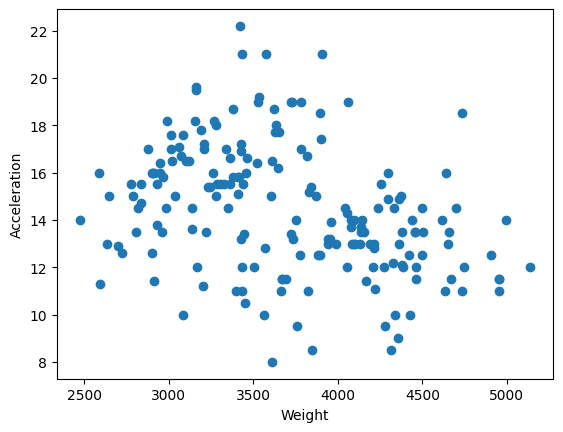

-0.3453988844462258
There is a negative correlation between weight and acceleration (-0.35)


In [49]:
df = df[(df["cylinders"] == 6) | (df["cylinders"] == 8)]

correlation = df["weight"].corr(df["acceleration"])

plt.scatter(df["weight"], df["acceleration"])
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.show()

print(correlation)

if correlation > 0:
    print(f"There is a positive correlation between weight and acceleration ({correlation:.2f})")
elif correlation < 0:
    print(f"There is a negative correlation between weight and acceleration ({correlation:.2f})")
